In [2]:
import importlib, importlib.util

def module_from_file(module_name, file_path):
    spec = importlib.util.spec_from_file_location(module_name, file_path)
    module = importlib.util.module_from_spec(spec)
    spec.loader.exec_module(module)
    return module

In [3]:
MLNN = module_from_file("myclasses", "MLNN.py")

In [4]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d 
import sklearn
from sklearn.model_selection import train_test_split
from itertools import permutations 
from scipy import stats
import random
from sklearn.metrics import confusion_matrix

In [1]:
def logistic(beta, x):
    return 1/(1 + np.exp(-beta*x))
    
def tanh(beta, x):
    return (np.exp(beta*x) - np.exp(beta*x))/(np.exp(beta*x) + np.exp(-beta*x))

def linear(beta, x):
    return x

def softmax(beta, x):
    return (np.exp(x.T)/sum(np.exp(x.T))).T


def act(actFun, vec, β):
    if(actFun == 'logistic'):
        return logistic(β, vec)
    elif(actFun == 'tanh'):
        return tanh(β, vec)
    elif(actFun == 'linear'):
        return linear(β, vec)
    elif(actFun == 'softmax'):
        return softmax(β, vec)
    else:
        print('No such activation function exists')
        return

In [5]:
def plotsAtHiddens(data ,W, actFuns, β):
    
    N, d = data.shape
        
    o = np.ones(N)
    o = np.reshape(o, (N, 1))
        
    S = []
    S.append(data)
        
    for h in range(len(actFuns)):
            
        dth = np.hstack((o, S[h]))
                
        Ah = np.dot(dth, W[h].T)
        Sh = act(actFuns[h], Ah, β)
        
        S.append(Sh)
        
        n, D = Sh.shape
        
        for i in range(D):
            
            if(d == 1):
                plt.scatter(data[:,0], Sh[:,i], s = 1)
                plt.title('%d th Node of %d th Layer'%(i+1,h+1))
                plt.show()
                
            elif(d == 2):
                
                fig = plt.figure() 
                ax = plt.axes(projection ='3d') 
    
                ax.scatter(data[:,0], data[:,1], Sh[:,i], c = 'c', s = 1) 
                plt.title('%d th Node of %d th Layer'%(i+1,h+1))
                plt.show() 

# Linearly Separable Data

In [6]:
class ReadData(object):
    
    def __init__(self, data, filepath, files):
        
        files = [filepath + '/' + file for file in files]
        self.files = files
        
        for i in range(len(files)):
            
            class_i = pd.read_csv(files[i], sep = ' ', header = None)
            data.append(class_i.values)
            
        self.data = data

        
    def kClass(self, k):
        return self.data[k]  


    def plotData(self):
        
        for i in range(len(self.files)):
            class_label = 'Class' + str(i+1)
            plt.scatter(self.kClass(i)[:,0], self.kClass(i)[:,1], label = class_label)

        plt.legend()    
        plt.show() 


    def train_validation_test_split(self, perTrain, perVal, perTest):
        
        train_data = []
        val_data = []
        test_data = []
        
        n = len(self.files)
        
        for i in range(n):
            
            train, test = train_test_split(self.kClass(i), test_size=perTest, random_state=42, shuffle=True)
            train, val = train_test_split(train, test_size = (perVal/(perVal + perTrain)), random_state=42, shuffle=True)
            
            train_data.append(train)
            val_data.append(val)
            test_data.append(test)
            
        return train_data, val_data, test_data

In [7]:
data = []
filenames = ['Class1.txt', 'Class2.txt', 'Class3.txt']
dataset = ReadData(data, 'Dataset/Classification/LS_Group17', filenames)

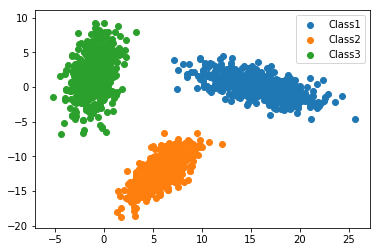

In [8]:
dataset.plotData()

In [9]:
trainData, valData, testData = dataset.train_validation_test_split(0.6,0.2,0.2)

In [10]:
k = len(trainData)
Xtrain = []
Ytrain = np.zeros(k)
for i in range(len(trainData)):
    for j in range(len(trainData[i])):
        a = np.zeros(k)
        a[i] = 1
        Ytrain = np.vstack((Ytrain, a))
        Xtrain.append(trainData[i][j])
        
Ytrain = Ytrain[1:,:]
Xtrain = np.array(Xtrain)

In [11]:
k = len(valData)
Xval = []
Yval = np.zeros(k)
for i in range(len(valData)):
    for j in range(len(valData[i])):
        a = np.zeros(k)
        a[i] = 1
        Yval = np.vstack((Yval, a))
        Xval.append(valData[i][j])
        
Yval = Yval[1:,:]
Xval = np.array(Xval)

In [12]:
k = len(testData)
Xtest = []
Ytest = np.zeros(k)
for i in range(len(testData)):
    for j in range(len(testData[i])):
        a = np.zeros(k)
        a[i] = 1
        Ytest = np.vstack((Ytest, a))
        Xtest.append(testData[i][j])
        
Ytest = Ytest[1:,:]
Xtest = np.array(Xtest)

In [13]:
def checkParam(η, α, β, epochs, low, high):

    nn = MLNN.MLNN([2,4,6,6,7,3], ['logistic','logistic','logistic','logistic','softmax'], low, high)
    W, E = nn.fit(Xtrain, Ytrain, η, α, β, epochs)
    
    predTrain = np.argmax(nn.predict(Xtrain, β), axis = 1)
    actualTrain = np.argmax(Ytrain, axis = 1)
    trainCorrect = np.sum(predTrain == actualTrain)
    
    print('Accuracy on Training data =', trainCorrect/(len(actualTrain)))
    print('Confusion Matrix:')
    print(confusion_matrix(actualTrain, predTrain))
    
    predVal = np.argmax(nn.predict(Xval, β), axis = 1)
    actualVal = np.argmax(Yval, axis = 1)
    valCorrect = np.sum(predVal == actualVal)

    print('Accuracy on Validation data =', valCorrect/(len(actualVal)))
    print('Confusion Matrix:')
    print(confusion_matrix(actualVal, predVal))
    
    return nn, W

echo 0, error = 20.27
echo 1, error = 19.89
echo 2, error = 17.91
echo 3, error = 17.80
echo 4, error = 17.75
echo 5, error = 17.53
echo 6, error = 17.21
echo 7, error = 16.77
echo 8, error = 16.56
echo 9, error = 16.29
echo 10, error = 16.06
echo 11, error = 15.83
echo 12, error = 15.62
echo 13, error = 15.42
echo 14, error = 15.22
echo 15, error = 15.03
echo 16, error = 14.83
echo 17, error = 14.61
echo 18, error = 14.34
echo 19, error = 13.92
echo 20, error = 12.92
echo 21, error = 11.87
echo 22, error = 11.49
echo 23, error = 10.99
echo 24, error = 10.48
echo 25, error = 10.23
echo 26, error = 10.07
echo 27, error = 9.94
echo 28, error = 9.81
echo 29, error = 9.69
echo 30, error = 9.57
echo 31, error = 9.46
echo 32, error = 9.34
echo 33, error = 9.23
echo 34, error = 9.12
echo 35, error = 9.01
echo 36, error = 8.91
echo 37, error = 8.80
echo 38, error = 8.69
echo 39, error = 8.59
echo 40, error = 8.48
echo 41, error = 8.38
echo 42, error = 8.28
echo 43, error = 8.17
echo 44, error 

echo 441, error = 0.01
echo 442, error = 0.01
echo 443, error = 0.02
echo 444, error = 0.02
echo 445, error = 0.02
echo 446, error = 0.02
echo 447, error = 0.02
echo 448, error = 0.02
echo 449, error = 0.02
echo 450, error = 0.02
echo 451, error = 0.02
echo 452, error = 0.02
echo 453, error = 0.02
echo 454, error = 0.02
echo 455, error = 0.02
echo 456, error = 0.02
echo 457, error = 0.02
echo 458, error = 0.01
echo 459, error = 0.01
echo 460, error = 0.01
echo 461, error = 0.01
echo 462, error = 0.01
echo 463, error = 0.01
echo 464, error = 0.01
echo 465, error = 0.01
echo 466, error = 0.01
echo 467, error = 0.01
echo 468, error = 0.01
echo 469, error = 0.01
echo 470, error = 0.01
echo 471, error = 0.01
echo 472, error = 0.01
echo 473, error = 0.01
echo 474, error = 0.01
echo 475, error = 0.01
echo 476, error = 0.01
echo 477, error = 0.01
echo 478, error = 0.01
echo 479, error = 0.01
echo 480, error = 0.01
echo 481, error = 0.01
echo 482, error = 0.01
echo 483, error = 0.01
echo 484, e

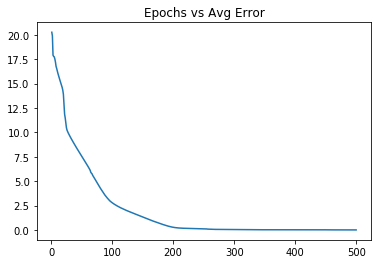

Accuracy on Training data = 0.9988888888888889
Confusion Matrix:
[[300   0   0]
 [  0 300   0]
 [  1   0 299]]
Accuracy on Validation data = 0.9966666666666667
Confusion Matrix:
[[100   0   0]
 [  0 100   0]
 [  1   0  99]]


In [14]:
nn, W = checkParam(0.10, 0.4, 1, 500, -3.5, 3.5)

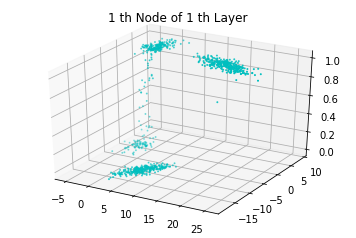

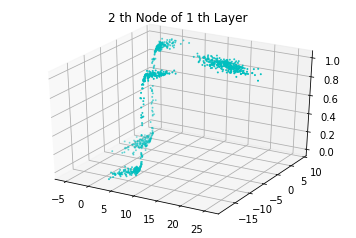

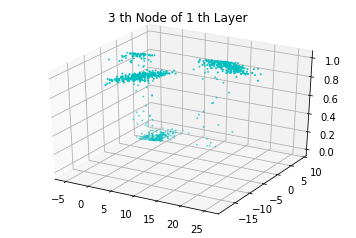

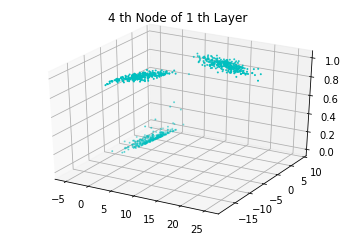

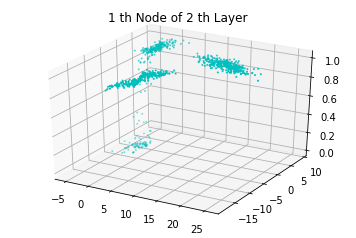

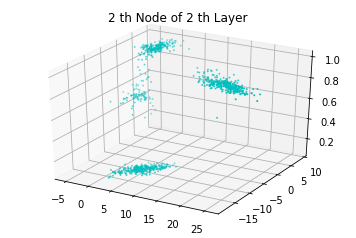

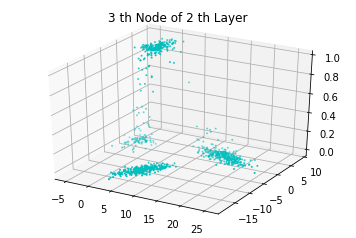

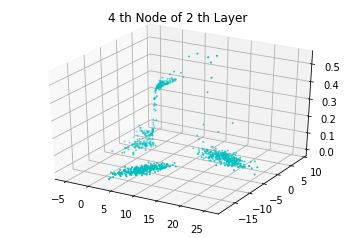

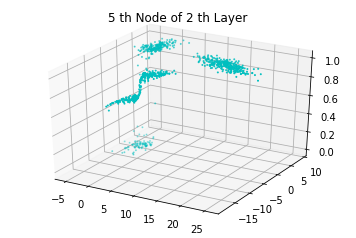

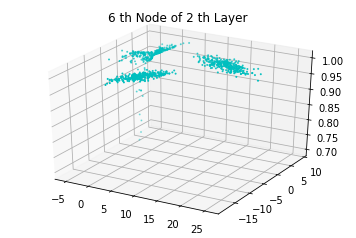

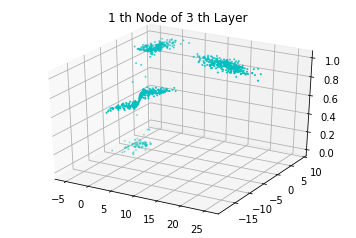

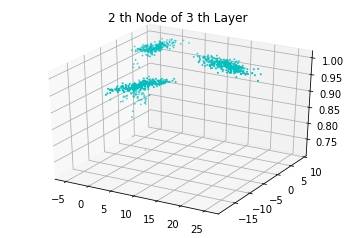

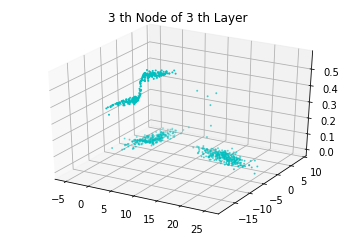

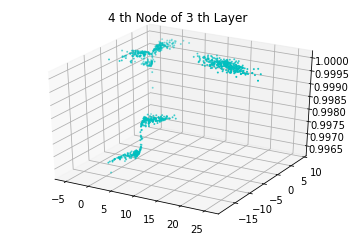

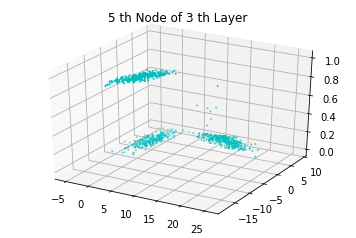

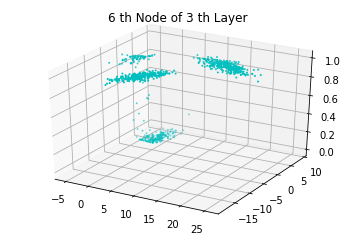

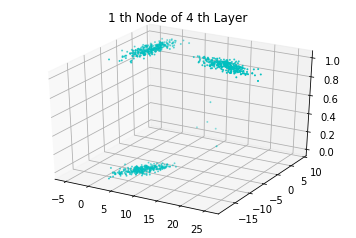

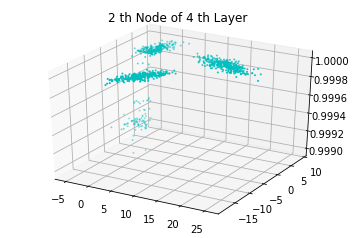

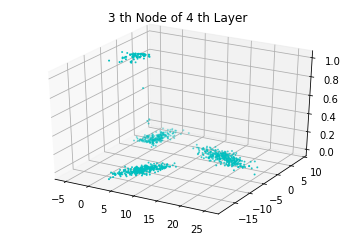

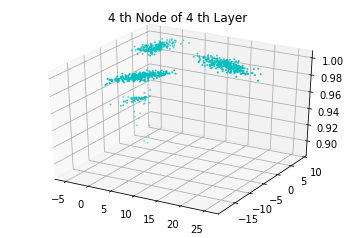

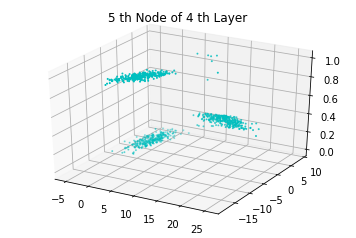

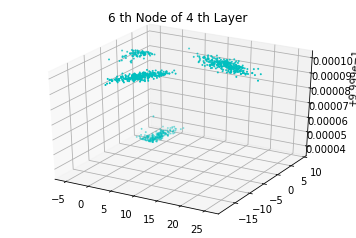

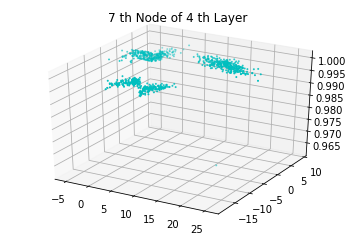

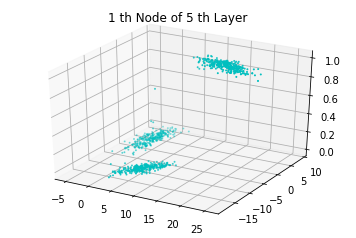

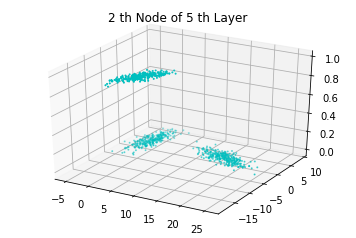

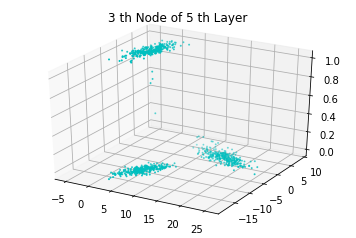

In [16]:
plotsAtHiddens(Xtrain, W, ['logistic','logistic','logistic','logistic','softmax'], 1)

Decision Plot


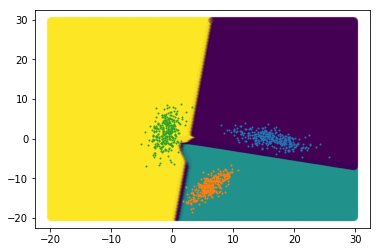

In [15]:
print('Decision Plot')
max = 30
min = -20
x = np.arange(min, max, 0.1)
y = np.arange(min, max, 0.1)
xx, yy = np.meshgrid(x, y)
l = len(x)*len(x)
dt = np.hstack((np.reshape(xx, (l, 1)), np.reshape(yy, (l, 1))))  
P = np.argmax(nn.predict(dt, 1), axis = 1)
plt.scatter(dt[:,0].reshape(-1,1),dt[:,1].reshape(-1,1), c= P.reshape(-1,1), alpha = 0.1)

for i in range(k):
    plt.scatter(trainData[i][:,0], trainData[i][:,1], s = 1)
            
plt.show()

In [17]:
predTest = np.argmax(nn.predict(Xtest,1), axis = 1)
actualTest = np.argmax(Ytest, axis = 1)
testCorrect = np.sum(predTest == actualTest)
    
print('Accuracy on Training data =', testCorrect/(len(actualTest)))
print('Confusion Matrix:')
print(confusion_matrix(actualTest, predTest))

Accuracy on Training data = 0.9966666666666667
Confusion Matrix:
[[100   0   0]
 [  1  99   0]
 [  0   0 100]]


# Non-linear Separable Data

In [19]:
class ReadData(object):
    
    def __init__(self, data, filepath, K, NEachClass):
        
        self.K = K
        self.NEachClass = NEachClass
        
        L = NEachClass[:]
        L.insert(0, 0)
        
        for i in range(K):
            
            class_i = pd.read_csv(filepath, sep = ' ', header = None, skiprows = 1 + L[i], usecols = [0,1], nrows =L[i+1])
            data.append(class_i.values)
            
        self.data = data

        
    def kClass(self, k):
        return self.data[k]  


    def plotData(self):
        
        for i in range(self.K):
            class_label = 'Class' + str(i+1)
            plt.scatter(self.kClass(i)[:,0], self.kClass(i)[:,1], label = class_label, s = 2)

        plt.legend()    
        plt.show() 


    def train_validation_test_split(self, perTrain, perVal, perTest):
        
        train_data = []
        val_data = []
        test_data = []
        
        n = self.K
        
        for i in range(n):
            
            train, test = train_test_split(self.kClass(i), test_size=perTest, random_state=42, shuffle=True)
            train, val = train_test_split(train, test_size = (perVal/(perVal + perTrain)), random_state=42, shuffle=True)
            
            train_data.append(train)
            val_data.append(val)
            test_data.append(test)
            
        return train_data, val_data, test_data

In [20]:
data = []
file =  'Dataset/Classification/NLS_Group17.txt' 
dataset = ReadData(data, file, 3, [300, 500, 1000])

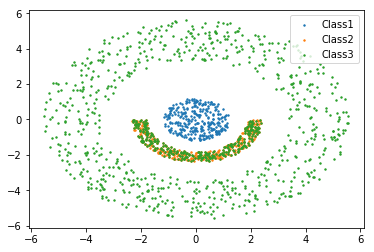

In [21]:
dataset.plotData()

In [22]:
trainData, valData, testData = dataset.train_validation_test_split(0.6,0.2,0.2)

In [23]:
k = len(trainData)
Xtrain = []
Ytrain = np.zeros(k)
for i in range(len(trainData)):
    for j in range(len(trainData[i])):
        a = np.zeros(k)
        a[i] = 1
        Ytrain = np.vstack((Ytrain, a))
        Xtrain.append(trainData[i][j])
        
Ytrain = Ytrain[1:,:]
Xtrain = np.array(Xtrain)

In [24]:
k = len(valData)
Xval = []
Yval = np.zeros(k)
for i in range(len(valData)):
    for j in range(len(valData[i])):
        a = np.zeros(k)
        a[i] = 1
        Yval = np.vstack((Yval, a))
        Xval.append(valData[i][j])
        
Yval = Yval[1:,:]
Xval = np.array(Xval)

In [25]:
k = len(testData)
Xtest = []
Ytest = np.zeros(k)
for i in range(len(testData)):
    for j in range(len(testData[i])):
        a = np.zeros(k)
        a[i] = 1
        Ytest = np.vstack((Ytest, a))
        Xtest.append(testData[i][j])
        
Ytest = Ytest[1:,:]
Xtest = np.array(Xtest)

In [95]:
def checkParam(η, α, β, epochs, low, high):

    nn = MLNN.MLNN([2,9,9,9,3], ['logistic','logistic','logistic','softmax'], low, high)
    W, E = nn.fit(Xtrain, Ytrain, η, α, β, epochs)
    
    predTrain = np.argmax(nn.predict(Xtrain, β), axis = 1)
    actualTrain = np.argmax(Ytrain, axis = 1)
    trainCorrect = np.sum(predTrain == actualTrain)
    
    print('Accuracy on Training data =', trainCorrect/(len(actualTrain)))
    print('Confusion Matrix:')
    print(confusion_matrix(actualTrain, predTrain))
    
    predVal = np.argmax(nn.predict(Xval, β), axis = 1)
    actualVal = np.argmax(Yval, axis = 1)
    valCorrect = np.sum(predVal == actualVal)

    print('Accuracy on Validation data =', valCorrect/(len(actualVal)))
    print('Confusion Matrix:')
    print(confusion_matrix(actualVal, predVal))
    
    return nn, W

echo 0, error = 8.25
echo 1, error = 8.17
echo 2, error = 8.05
echo 3, error = 7.94
echo 4, error = 7.84
echo 5, error = 7.73
echo 6, error = 7.64
echo 7, error = 7.54
echo 8, error = 7.45
echo 9, error = 7.35
echo 10, error = 7.26
echo 11, error = 7.16
echo 12, error = 7.07
echo 13, error = 6.97
echo 14, error = 6.86
echo 15, error = 6.76
echo 16, error = 6.64
echo 17, error = 6.53
echo 18, error = 6.41
echo 19, error = 6.29
echo 20, error = 6.18
echo 21, error = 6.08
echo 22, error = 5.99
echo 23, error = 5.90
echo 24, error = 5.82
echo 25, error = 5.75
echo 26, error = 5.69
echo 27, error = 5.63
echo 28, error = 5.57
echo 29, error = 5.51
echo 30, error = 5.45
echo 31, error = 5.40
echo 32, error = 5.35
echo 33, error = 5.29
echo 34, error = 5.24
echo 35, error = 5.19
echo 36, error = 5.14
echo 37, error = 5.09
echo 38, error = 5.05
echo 39, error = 5.00
echo 40, error = 4.95
echo 41, error = 4.91
echo 42, error = 4.86
echo 43, error = 4.82
echo 44, error = 4.77
echo 45, error = 4.7

echo 378, error = 1.00
echo 379, error = 1.00
echo 380, error = 1.00
echo 381, error = 0.99
echo 382, error = 0.99
echo 383, error = 0.99
echo 384, error = 0.99
echo 385, error = 0.98
echo 386, error = 0.98
echo 387, error = 0.98
echo 388, error = 0.97
echo 389, error = 0.97
echo 390, error = 0.97
echo 391, error = 0.97
echo 392, error = 0.96
echo 393, error = 0.96
echo 394, error = 0.96
echo 395, error = 0.96
echo 396, error = 0.95
echo 397, error = 0.95
echo 398, error = 0.95
echo 399, error = 0.94
echo 400, error = 0.94
echo 401, error = 0.94
echo 402, error = 0.94
echo 403, error = 0.93
echo 404, error = 0.93
echo 405, error = 0.93
echo 406, error = 0.93
echo 407, error = 0.92
echo 408, error = 0.92
echo 409, error = 0.92
echo 410, error = 0.92
echo 411, error = 0.91
echo 412, error = 0.91
echo 413, error = 0.91
echo 414, error = 0.91
echo 415, error = 0.90
echo 416, error = 0.90
echo 417, error = 0.90
echo 418, error = 0.90
echo 419, error = 0.90
echo 420, error = 0.89
echo 421, e

echo 839, error = 0.50
echo 840, error = 0.50
echo 841, error = 0.50
echo 842, error = 0.50
echo 843, error = 0.50
echo 844, error = 0.50
echo 845, error = 0.50
echo 846, error = 0.50
echo 847, error = 0.50
echo 848, error = 0.50
echo 849, error = 0.50
echo 850, error = 0.50
echo 851, error = 0.50
echo 852, error = 0.50
echo 853, error = 0.50
echo 854, error = 0.50
echo 855, error = 0.50
echo 856, error = 0.50
echo 857, error = 0.50
echo 858, error = 0.50
echo 859, error = 0.50
echo 860, error = 0.50
echo 861, error = 0.50
echo 862, error = 0.50
echo 863, error = 0.50
echo 864, error = 0.50
echo 865, error = 0.50
echo 866, error = 0.50
echo 867, error = 0.50
echo 868, error = 0.50
echo 869, error = 0.50
echo 870, error = 0.50
echo 871, error = 0.50
echo 872, error = 0.50
echo 873, error = 0.50
echo 874, error = 0.50
echo 875, error = 0.50
echo 876, error = 0.50
echo 877, error = 0.50
echo 878, error = 0.50
echo 879, error = 0.50
echo 880, error = 0.50
echo 881, error = 0.50
echo 882, e

echo 1197, error = 0.47
echo 1198, error = 0.47
echo 1199, error = 0.47
echo 1200, error = 0.47
echo 1201, error = 0.47
echo 1202, error = 0.47
echo 1203, error = 0.47
echo 1204, error = 0.47
echo 1205, error = 0.47
echo 1206, error = 0.47
echo 1207, error = 0.47
echo 1208, error = 0.47
echo 1209, error = 0.46
echo 1210, error = 0.46
echo 1211, error = 0.46
echo 1212, error = 0.46
echo 1213, error = 0.46
echo 1214, error = 0.46
echo 1215, error = 0.46
echo 1216, error = 0.46
echo 1217, error = 0.46
echo 1218, error = 0.46
echo 1219, error = 0.46
echo 1220, error = 0.46
echo 1221, error = 0.46
echo 1222, error = 0.46
echo 1223, error = 0.46
echo 1224, error = 0.46
echo 1225, error = 0.46
echo 1226, error = 0.46
echo 1227, error = 0.46
echo 1228, error = 0.46
echo 1229, error = 0.46
echo 1230, error = 0.46
echo 1231, error = 0.46
echo 1232, error = 0.46
echo 1233, error = 0.46
echo 1234, error = 0.46
echo 1235, error = 0.46
echo 1236, error = 0.46
echo 1237, error = 0.46
echo 1238, error

echo 1570, error = 0.46
echo 1571, error = 0.46
echo 1572, error = 0.46
echo 1573, error = 0.46
echo 1574, error = 0.46
echo 1575, error = 0.46
echo 1576, error = 0.46
echo 1577, error = 0.46
echo 1578, error = 0.46
echo 1579, error = 0.46
echo 1580, error = 0.46
echo 1581, error = 0.46
echo 1582, error = 0.46
echo 1583, error = 0.46
echo 1584, error = 0.46
echo 1585, error = 0.46
echo 1586, error = 0.46
echo 1587, error = 0.46
echo 1588, error = 0.46
echo 1589, error = 0.46
echo 1590, error = 0.46
echo 1591, error = 0.46
echo 1592, error = 0.46
echo 1593, error = 0.46
echo 1594, error = 0.46
echo 1595, error = 0.46
echo 1596, error = 0.46
echo 1597, error = 0.46
echo 1598, error = 0.46
echo 1599, error = 0.46
echo 1600, error = 0.46
echo 1601, error = 0.46
echo 1602, error = 0.46
echo 1603, error = 0.46
echo 1604, error = 0.46
echo 1605, error = 0.46
echo 1606, error = 0.46
echo 1607, error = 0.46
echo 1608, error = 0.46
echo 1609, error = 0.46
echo 1610, error = 0.46
echo 1611, error

echo 1931, error = 0.45
echo 1932, error = 0.45
echo 1933, error = 0.45
echo 1934, error = 0.45
echo 1935, error = 0.45
echo 1936, error = 0.45
echo 1937, error = 0.45
echo 1938, error = 0.45
echo 1939, error = 0.45
echo 1940, error = 0.45
echo 1941, error = 0.45
echo 1942, error = 0.45
echo 1943, error = 0.44
echo 1944, error = 0.44
echo 1945, error = 0.44
echo 1946, error = 0.44
echo 1947, error = 0.44
echo 1948, error = 0.44
echo 1949, error = 0.44
echo 1950, error = 0.44
echo 1951, error = 0.44
echo 1952, error = 0.44
echo 1953, error = 0.44
echo 1954, error = 0.44
echo 1955, error = 0.44
echo 1956, error = 0.44
echo 1957, error = 0.44
echo 1958, error = 0.44
echo 1959, error = 0.44
echo 1960, error = 0.44
echo 1961, error = 0.44
echo 1962, error = 0.44
echo 1963, error = 0.44
echo 1964, error = 0.44
echo 1965, error = 0.44
echo 1966, error = 0.44
echo 1967, error = 0.44
echo 1968, error = 0.44
echo 1969, error = 0.44
echo 1970, error = 0.44
echo 1971, error = 0.44
echo 1972, error

echo 2366, error = 0.39
echo 2367, error = 0.39
echo 2368, error = 0.39
echo 2369, error = 0.39
echo 2370, error = 0.39
echo 2371, error = 0.39
echo 2372, error = 0.39
echo 2373, error = 0.39
echo 2374, error = 0.39
echo 2375, error = 0.39
echo 2376, error = 0.39
echo 2377, error = 0.39
echo 2378, error = 0.39
echo 2379, error = 0.39
echo 2380, error = 0.39
echo 2381, error = 0.39
echo 2382, error = 0.39
echo 2383, error = 0.39
echo 2384, error = 0.39
echo 2385, error = 0.39
echo 2386, error = 0.39
echo 2387, error = 0.39
echo 2388, error = 0.39
echo 2389, error = 0.39
echo 2390, error = 0.39
echo 2391, error = 0.39
echo 2392, error = 0.39
echo 2393, error = 0.39
echo 2394, error = 0.39
echo 2395, error = 0.39
echo 2396, error = 0.39
echo 2397, error = 0.39
echo 2398, error = 0.39
echo 2399, error = 0.39
echo 2400, error = 0.39
echo 2401, error = 0.39
echo 2402, error = 0.39
echo 2403, error = 0.39
echo 2404, error = 0.39
echo 2405, error = 0.39
echo 2406, error = 0.39
echo 2407, error

echo 2824, error = 0.35
echo 2825, error = 0.35
echo 2826, error = 0.35
echo 2827, error = 0.35
echo 2828, error = 0.35
echo 2829, error = 0.35
echo 2830, error = 0.35
echo 2831, error = 0.35
echo 2832, error = 0.35
echo 2833, error = 0.35
echo 2834, error = 0.35
echo 2835, error = 0.35
echo 2836, error = 0.35
echo 2837, error = 0.35
echo 2838, error = 0.35
echo 2839, error = 0.35
echo 2840, error = 0.35
echo 2841, error = 0.35
echo 2842, error = 0.35
echo 2843, error = 0.35
echo 2844, error = 0.35
echo 2845, error = 0.35
echo 2846, error = 0.35
echo 2847, error = 0.35
echo 2848, error = 0.35
echo 2849, error = 0.35
echo 2850, error = 0.35
echo 2851, error = 0.35
echo 2852, error = 0.35
echo 2853, error = 0.35
echo 2854, error = 0.35
echo 2855, error = 0.35
echo 2856, error = 0.35
echo 2857, error = 0.35
echo 2858, error = 0.35
echo 2859, error = 0.35
echo 2860, error = 0.35
echo 2861, error = 0.35
echo 2862, error = 0.35
echo 2863, error = 0.35
echo 2864, error = 0.35
echo 2865, error

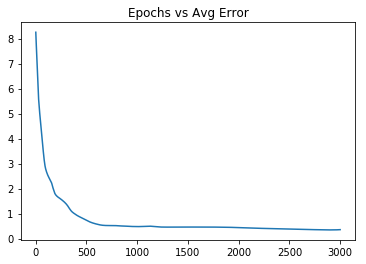

Accuracy on Training data = 0.7620370370370371
Confusion Matrix:
[[180   0   0]
 [ 53 201  46]
 [ 34 124 442]]
Accuracy on Validation data = 0.725
Confusion Matrix:
[[ 60   0   0]
 [ 23  63  14]
 [ 16  46 138]]


In [102]:
nn, W = checkParam(0.025, 0.4, 1, 3000, -3, 3)

Decision Plot


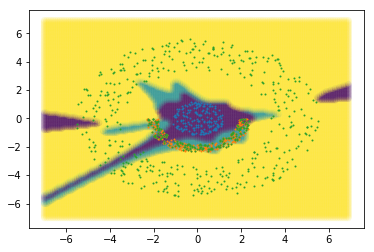

In [103]:
print('Decision Plot')
max = 7
min = -7
x = np.arange(min, max, 0.1)
y = np.arange(min, max, 0.1)
xx, yy = np.meshgrid(x, y)
l = len(x)*len(x)
dt = np.hstack((np.reshape(xx, (l, 1)), np.reshape(yy, (l, 1))))  
P = np.argmax(nn.predict(dt, 1), axis = 1)
plt.scatter(dt[:,0].reshape(-1,1),dt[:,1].reshape(-1,1), c= P.reshape(-1,1), alpha = 0.1)

for i in range(k):
    plt.scatter(trainData[i][:,0], trainData[i][:,1], s = 1)
            
plt.show()

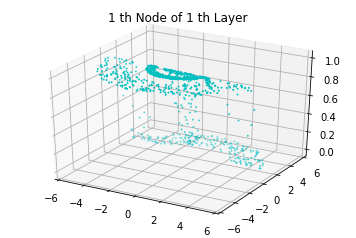

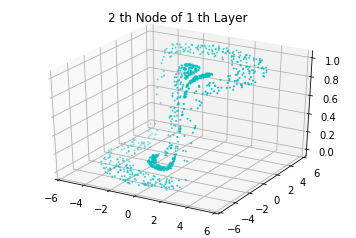

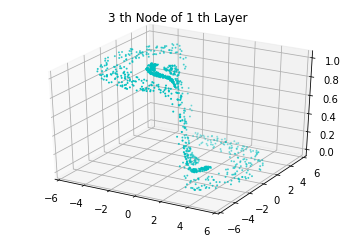

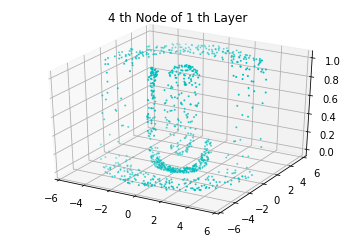

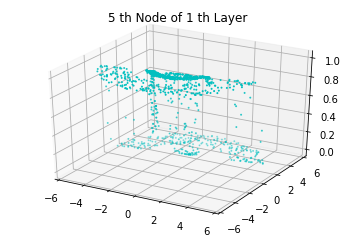

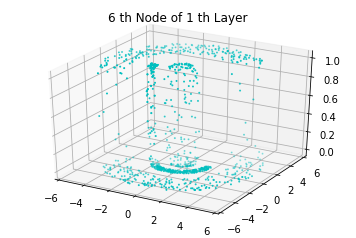

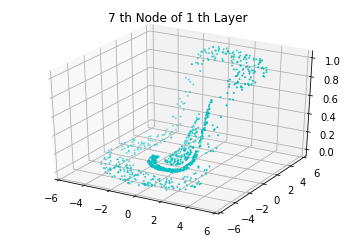

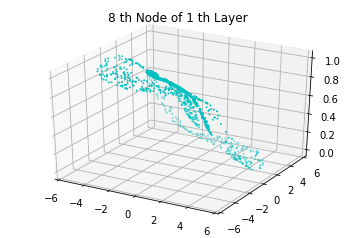

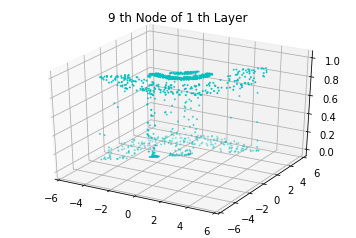

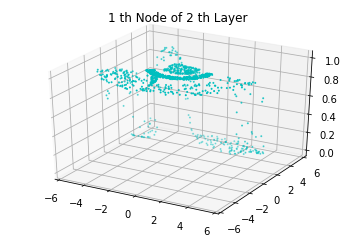

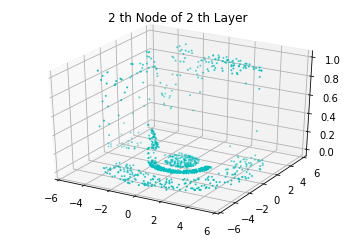

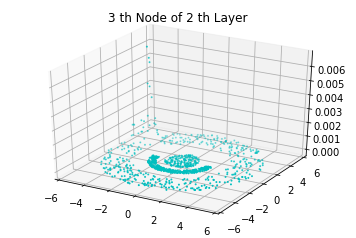

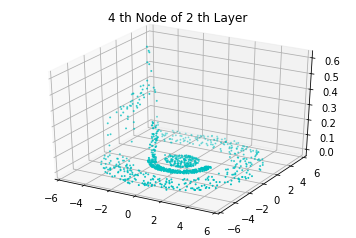

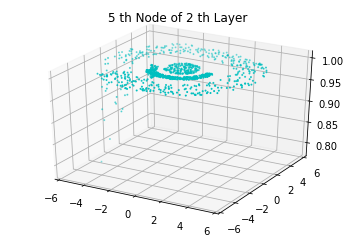

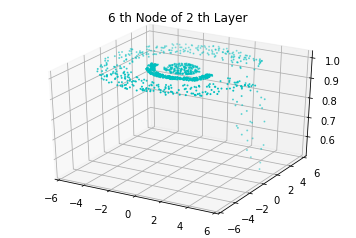

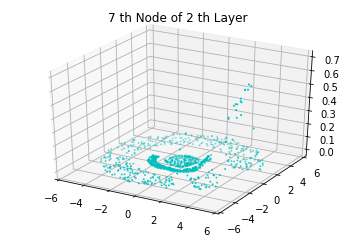

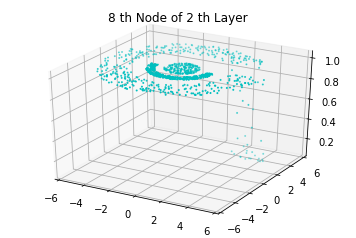

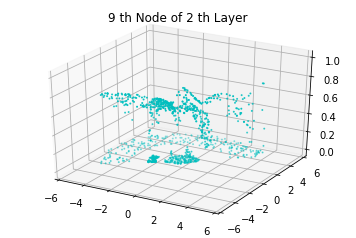

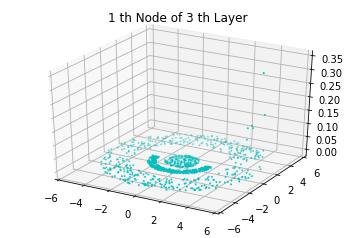

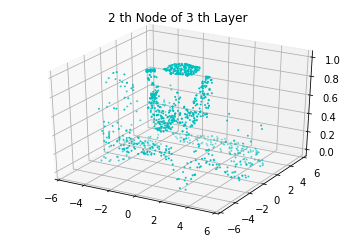

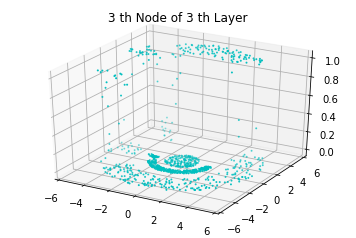

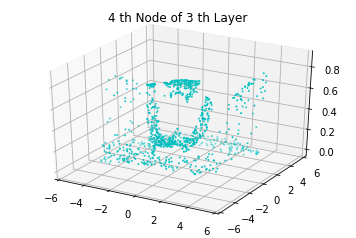

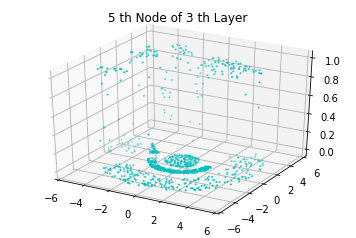

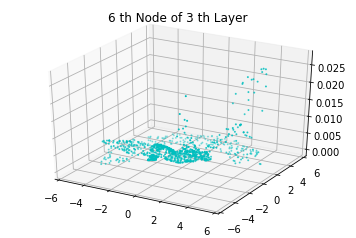

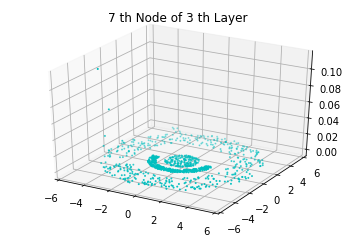

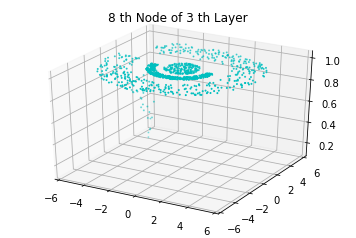

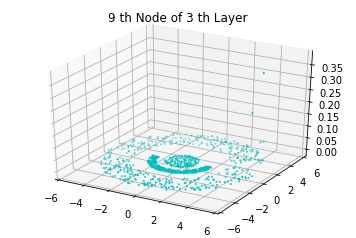

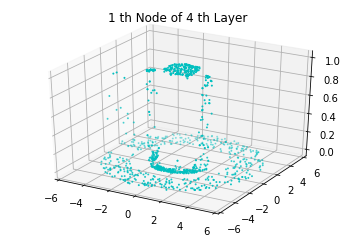

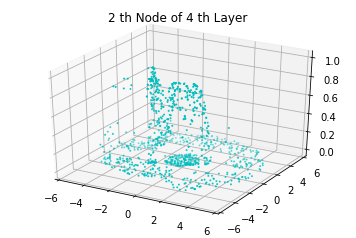

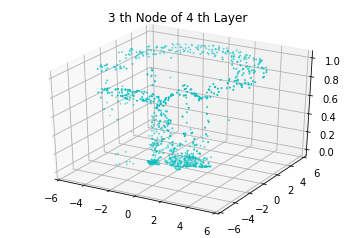

In [104]:
plotsAtHiddens(Xtrain, W, ['logistic','logistic','logistic','softmax'], 1)

In [105]:
predTest = np.argmax(nn.predict(Xtest, 1), axis = 1)
actualTest = np.argmax(Ytest, axis = 1)
testCorrect = np.sum(predTest == actualTest)
    
print('Accuracy on Training data =', testCorrect/(len(actualTest)))
print('Confusion Matrix:')
print(confusion_matrix(actualTest, predTest))

Accuracy on Training data = 0.725
Confusion Matrix:
[[ 60   0   0]
 [ 19  57  24]
 [ 20  36 144]]


# Some Other Experiments

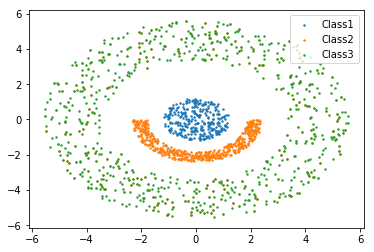

In [106]:
data = []
file =  'Dataset/Classification/NLS_Group17.txt' 
dataset = ReadData(data, file, 3, [300, 800, 700])
dataset.plotData()

In [107]:
trainData, valData, testData = dataset.train_validation_test_split(0.6,0.2,0.2)

In [108]:
k = len(trainData)
Xtrain = []
Ytrain = np.zeros(k)
for i in range(len(trainData)):
    for j in range(len(trainData[i])):
        a = np.zeros(k)
        a[i] = 1
        Ytrain = np.vstack((Ytrain, a))
        Xtrain.append(trainData[i][j])
        
Ytrain = Ytrain[1:,:]
Xtrain = np.array(Xtrain)

In [109]:
k = len(valData)
Xval = []
Yval = np.zeros(k)
for i in range(len(valData)):
    for j in range(len(valData[i])):
        a = np.zeros(k)
        a[i] = 1
        Yval = np.vstack((Yval, a))
        Xval.append(valData[i][j])
        
Yval = Yval[1:,:]
Xval = np.array(Xval)

In [110]:
k = len(testData)
Xtest = []
Ytest = np.zeros(k)
for i in range(len(testData)):
    for j in range(len(testData[i])):
        a = np.zeros(k)
        a[i] = 1
        Ytest = np.vstack((Ytest, a))
        Xtest.append(testData[i][j])
        
Ytest = Ytest[1:,:]
Xtest = np.array(Xtest)

In [188]:
def checkParam(η, α, β, epochs, low, high):

    nn = MLNN.MLNN([2,7,9,9,3], ['logistic','logistic','logistic','softmax'], low, high)
    W, E = nn.fit(Xtrain, Ytrain, η, α, β, epochs)
    
    predTrain = np.argmax(nn.predict(Xtrain, β), axis = 1)
    actualTrain = np.argmax(Ytrain, axis = 1)
    trainCorrect = np.sum(predTrain == actualTrain)
    
    print('Accuracy on Training data =', trainCorrect/(len(actualTrain)))
    print('Confusion Matrix:')
    print(confusion_matrix(actualTrain, predTrain))
    
    predVal = np.argmax(nn.predict(Xval, β), axis = 1)
    actualVal = np.argmax(Yval, axis = 1)
    valCorrect = np.sum(predVal == actualVal)

    print('Accuracy on Validation data =', valCorrect/(len(actualVal)))
    print('Confusion Matrix:')
    print(confusion_matrix(actualVal, predVal))
    
    return nn, W

echo 0, error = 6.79
echo 1, error = 6.78
echo 2, error = 6.77
echo 3, error = 6.76
echo 4, error = 6.75
echo 5, error = 6.74
echo 6, error = 6.73
echo 7, error = 6.72
echo 8, error = 6.71
echo 9, error = 6.70
echo 10, error = 6.69
echo 11, error = 6.68
echo 12, error = 6.67
echo 13, error = 6.66
echo 14, error = 6.65
echo 15, error = 6.64
echo 16, error = 6.63
echo 17, error = 6.62
echo 18, error = 6.60
echo 19, error = 6.59
echo 20, error = 6.58
echo 21, error = 6.57
echo 22, error = 6.56
echo 23, error = 6.55
echo 24, error = 6.54
echo 25, error = 6.53
echo 26, error = 6.52
echo 27, error = 6.51
echo 28, error = 6.50
echo 29, error = 6.49
echo 30, error = 6.48
echo 31, error = 6.47
echo 32, error = 6.45
echo 33, error = 6.44
echo 34, error = 6.43
echo 35, error = 6.42
echo 36, error = 6.41
echo 37, error = 6.40
echo 38, error = 6.39
echo 39, error = 6.38
echo 40, error = 6.37
echo 41, error = 6.36
echo 42, error = 6.35
echo 43, error = 6.33
echo 44, error = 6.32
echo 45, error = 6.3

echo 368, error = 3.69
echo 369, error = 3.68
echo 370, error = 3.67
echo 371, error = 3.66
echo 372, error = 3.65
echo 373, error = 3.64
echo 374, error = 3.63
echo 375, error = 3.62
echo 376, error = 3.61
echo 377, error = 3.60
echo 378, error = 3.59
echo 379, error = 3.58
echo 380, error = 3.58
echo 381, error = 3.57
echo 382, error = 3.56
echo 383, error = 3.55
echo 384, error = 3.54
echo 385, error = 3.53
echo 386, error = 3.52
echo 387, error = 3.51
echo 388, error = 3.50
echo 389, error = 3.49
echo 390, error = 3.48
echo 391, error = 3.47
echo 392, error = 3.46
echo 393, error = 3.45
echo 394, error = 3.44
echo 395, error = 3.43
echo 396, error = 3.42
echo 397, error = 3.41
echo 398, error = 3.41
echo 399, error = 3.40
echo 400, error = 3.39
echo 401, error = 3.38
echo 402, error = 3.37
echo 403, error = 3.36
echo 404, error = 3.35
echo 405, error = 3.34
echo 406, error = 3.33
echo 407, error = 3.32
echo 408, error = 3.31
echo 409, error = 3.31
echo 410, error = 3.30
echo 411, e

echo 733, error = 1.84
echo 734, error = 1.84
echo 735, error = 1.84
echo 736, error = 1.84
echo 737, error = 1.84
echo 738, error = 1.84
echo 739, error = 1.83
echo 740, error = 1.83
echo 741, error = 1.83
echo 742, error = 1.83
echo 743, error = 1.83
echo 744, error = 1.83
echo 745, error = 1.82
echo 746, error = 1.82
echo 747, error = 1.82
echo 748, error = 1.82
echo 749, error = 1.82
echo 750, error = 1.82
echo 751, error = 1.82
echo 752, error = 1.81
echo 753, error = 1.81
echo 754, error = 1.81
echo 755, error = 1.81
echo 756, error = 1.81
echo 757, error = 1.81
echo 758, error = 1.80
echo 759, error = 1.80
echo 760, error = 1.80
echo 761, error = 1.80
echo 762, error = 1.80
echo 763, error = 1.80
echo 764, error = 1.79
echo 765, error = 1.79
echo 766, error = 1.79
echo 767, error = 1.79
echo 768, error = 1.79
echo 769, error = 1.79
echo 770, error = 1.78
echo 771, error = 1.78
echo 772, error = 1.78
echo 773, error = 1.78
echo 774, error = 1.78
echo 775, error = 1.78
echo 776, e

echo 1177, error = 1.02
echo 1178, error = 1.02
echo 1179, error = 1.02
echo 1180, error = 1.02
echo 1181, error = 1.02
echo 1182, error = 1.02
echo 1183, error = 1.01
echo 1184, error = 1.01
echo 1185, error = 1.01
echo 1186, error = 1.01
echo 1187, error = 1.01
echo 1188, error = 1.01
echo 1189, error = 1.00
echo 1190, error = 1.00
echo 1191, error = 1.00
echo 1192, error = 1.00
echo 1193, error = 1.00
echo 1194, error = 1.00
echo 1195, error = 0.99
echo 1196, error = 0.99
echo 1197, error = 0.99
echo 1198, error = 0.99
echo 1199, error = 0.99
echo 1200, error = 0.99
echo 1201, error = 0.99
echo 1202, error = 0.99
echo 1203, error = 0.98
echo 1204, error = 0.98
echo 1205, error = 0.98
echo 1206, error = 0.98
echo 1207, error = 0.98
echo 1208, error = 0.98
echo 1209, error = 0.98
echo 1210, error = 0.98
echo 1211, error = 0.98
echo 1212, error = 0.98
echo 1213, error = 0.98
echo 1214, error = 0.98
echo 1215, error = 0.98
echo 1216, error = 0.98
echo 1217, error = 0.98
echo 1218, error

echo 1631, error = 1.00
echo 1632, error = 1.00
echo 1633, error = 1.00
echo 1634, error = 1.00
echo 1635, error = 1.00
echo 1636, error = 1.00
echo 1637, error = 1.00
echo 1638, error = 1.00
echo 1639, error = 1.00
echo 1640, error = 1.00
echo 1641, error = 1.00
echo 1642, error = 1.00
echo 1643, error = 1.00
echo 1644, error = 1.00
echo 1645, error = 1.00
echo 1646, error = 1.00
echo 1647, error = 1.00
echo 1648, error = 1.00
echo 1649, error = 1.00
echo 1650, error = 1.00
echo 1651, error = 1.00
echo 1652, error = 0.99
echo 1653, error = 0.99
echo 1654, error = 0.99
echo 1655, error = 0.99
echo 1656, error = 0.99
echo 1657, error = 0.99
echo 1658, error = 0.99
echo 1659, error = 0.99
echo 1660, error = 0.99
echo 1661, error = 0.99
echo 1662, error = 0.99
echo 1663, error = 0.99
echo 1664, error = 0.99
echo 1665, error = 0.99
echo 1666, error = 0.99
echo 1667, error = 0.99
echo 1668, error = 0.99
echo 1669, error = 0.99
echo 1670, error = 0.99
echo 1671, error = 0.99
echo 1672, error

echo 1980, error = 0.87
echo 1981, error = 0.87
echo 1982, error = 0.87
echo 1983, error = 0.87
echo 1984, error = 0.87
echo 1985, error = 0.87
echo 1986, error = 0.87
echo 1987, error = 0.87
echo 1988, error = 0.87
echo 1989, error = 0.87
echo 1990, error = 0.87
echo 1991, error = 0.87
echo 1992, error = 0.87
echo 1993, error = 0.87
echo 1994, error = 0.87
echo 1995, error = 0.87
echo 1996, error = 0.87
echo 1997, error = 0.87
echo 1998, error = 0.87
echo 1999, error = 0.87
echo 2000, error = 0.87
echo 2001, error = 0.87
echo 2002, error = 0.87
echo 2003, error = 0.87
echo 2004, error = 0.87
echo 2005, error = 0.87
echo 2006, error = 0.87
echo 2007, error = 0.87
echo 2008, error = 0.87
echo 2009, error = 0.87
echo 2010, error = 0.87
echo 2011, error = 0.87
echo 2012, error = 0.87
echo 2013, error = 0.86
echo 2014, error = 0.86
echo 2015, error = 0.86
echo 2016, error = 0.86
echo 2017, error = 0.86
echo 2018, error = 0.86
echo 2019, error = 0.86
echo 2020, error = 0.86
echo 2021, error

echo 2442, error = 0.81
echo 2443, error = 0.81
echo 2444, error = 0.81
echo 2445, error = 0.81
echo 2446, error = 0.81
echo 2447, error = 0.81
echo 2448, error = 0.81
echo 2449, error = 0.81
echo 2450, error = 0.81
echo 2451, error = 0.81
echo 2452, error = 0.81
echo 2453, error = 0.81
echo 2454, error = 0.81
echo 2455, error = 0.81
echo 2456, error = 0.81
echo 2457, error = 0.81
echo 2458, error = 0.81
echo 2459, error = 0.80
echo 2460, error = 0.80
echo 2461, error = 0.80
echo 2462, error = 0.80
echo 2463, error = 0.80
echo 2464, error = 0.80
echo 2465, error = 0.80
echo 2466, error = 0.80
echo 2467, error = 0.80
echo 2468, error = 0.80
echo 2469, error = 0.80
echo 2470, error = 0.80
echo 2471, error = 0.80
echo 2472, error = 0.80
echo 2473, error = 0.80
echo 2474, error = 0.80
echo 2475, error = 0.80
echo 2476, error = 0.80
echo 2477, error = 0.80
echo 2478, error = 0.80
echo 2479, error = 0.80
echo 2480, error = 0.80
echo 2481, error = 0.80
echo 2482, error = 0.80
echo 2483, error

echo 2879, error = 0.75
echo 2880, error = 0.75
echo 2881, error = 0.75
echo 2882, error = 0.75
echo 2883, error = 0.75
echo 2884, error = 0.75
echo 2885, error = 0.75
echo 2886, error = 0.75
echo 2887, error = 0.75
echo 2888, error = 0.75
echo 2889, error = 0.75
echo 2890, error = 0.75
echo 2891, error = 0.75
echo 2892, error = 0.75
echo 2893, error = 0.75
echo 2894, error = 0.75
echo 2895, error = 0.75
echo 2896, error = 0.75
echo 2897, error = 0.75
echo 2898, error = 0.75
echo 2899, error = 0.75
echo 2900, error = 0.75
echo 2901, error = 0.75
echo 2902, error = 0.75
echo 2903, error = 0.75
echo 2904, error = 0.75
echo 2905, error = 0.75
echo 2906, error = 0.75
echo 2907, error = 0.75
echo 2908, error = 0.75
echo 2909, error = 0.75
echo 2910, error = 0.75
echo 2911, error = 0.75
echo 2912, error = 0.75
echo 2913, error = 0.75
echo 2914, error = 0.75
echo 2915, error = 0.75
echo 2916, error = 0.75
echo 2917, error = 0.75
echo 2918, error = 0.75
echo 2919, error = 0.75
echo 2920, error

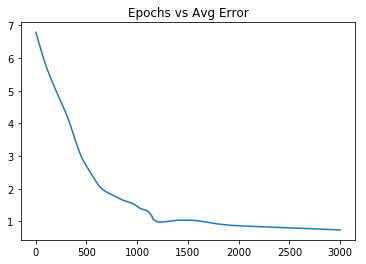

Accuracy on Training data = 0.5824074074074074
Confusion Matrix:
[[ 10 170   0]
 [  0 391  89]
 [  0 192 228]]
Accuracy on Validation data = 0.5638888888888889
Confusion Matrix:
[[  0  60   0]
 [  0 125  35]
 [  0  62  78]]


In [197]:
nn, W = checkParam(0.015, 0.4, 1, 3000, -3, 3)

Decision Plot


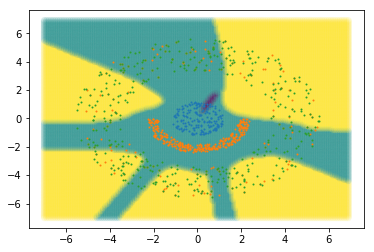

In [198]:
print('Decision Plot')
max = 7
min = -7
x = np.arange(min, max, 0.1)
y = np.arange(min, max, 0.1)
xx, yy = np.meshgrid(x, y)
l = len(x)*len(x)
dt = np.hstack((np.reshape(xx, (l, 1)), np.reshape(yy, (l, 1))))  
P = np.argmax(nn.predict(dt, 1), axis = 1)
plt.scatter(dt[:,0].reshape(-1,1),dt[:,1].reshape(-1,1), c= P.reshape(-1,1), alpha = 0.1)

for i in range(k):
    plt.scatter(trainData[i][:,0], trainData[i][:,1], s = 1)
            
plt.show()

In [199]:
predTest = np.argmax(nn.predict(Xtest, 1), axis = 1)
actualTest = np.argmax(Ytest, axis = 1)
testCorrect = np.sum(predTest == actualTest)
    
print('Accuracy on Training data =', testCorrect/(len(actualTest)))
print('Confusion Matrix:')
print(confusion_matrix(actualTest, predTest))

Accuracy on Training data = 0.575
Confusion Matrix:
[[  2  58   0]
 [  0 118  42]
 [  0  53  87]]


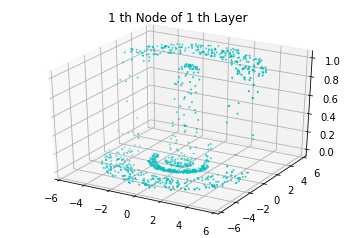

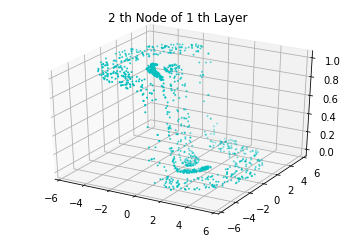

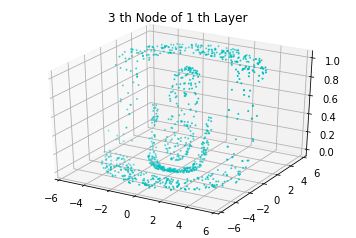

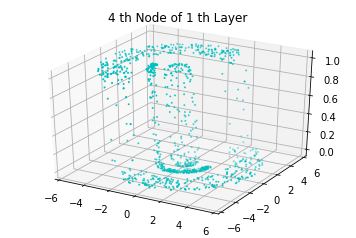

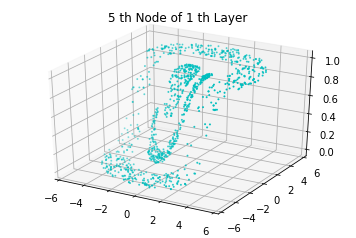

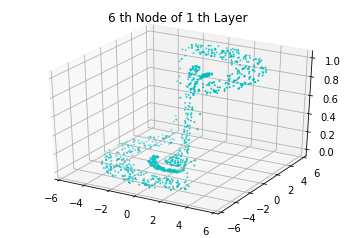

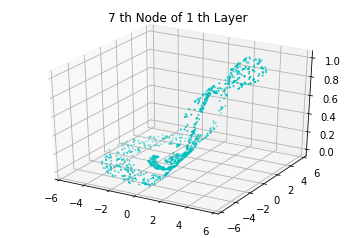

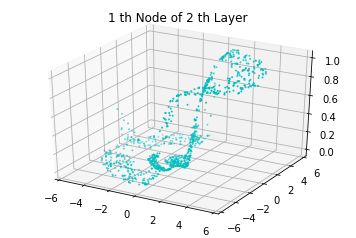

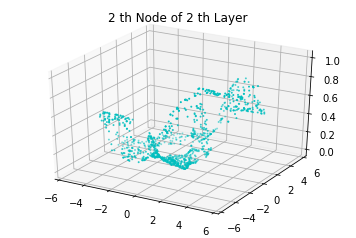

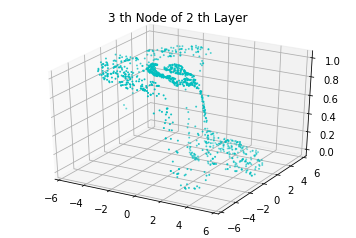

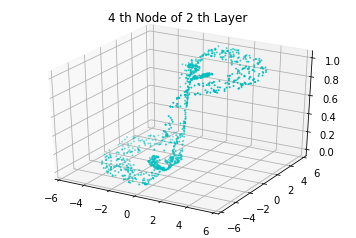

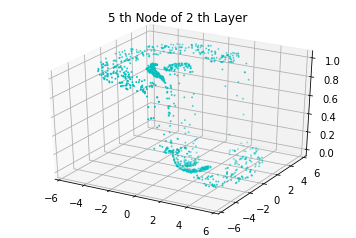

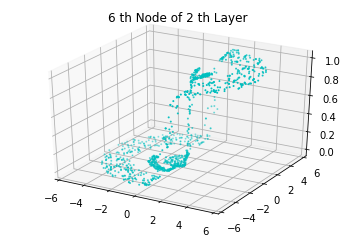

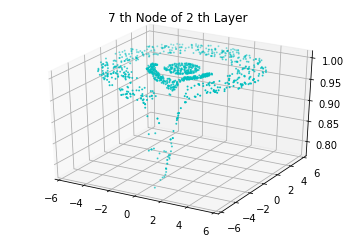

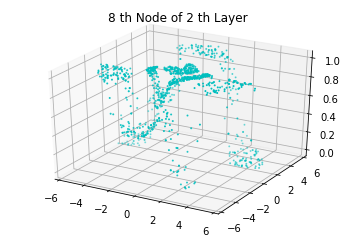

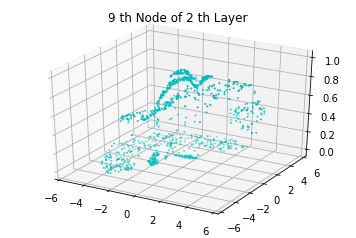

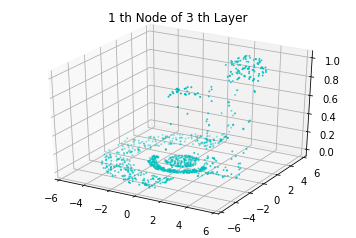

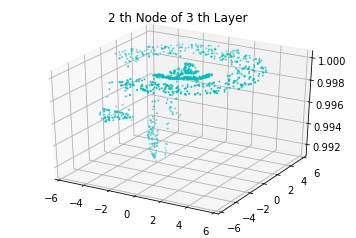

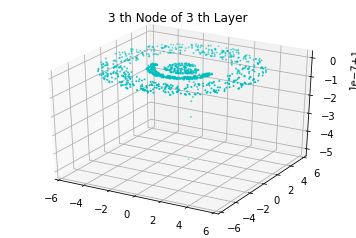

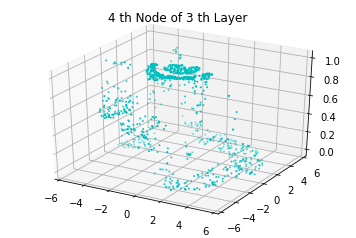

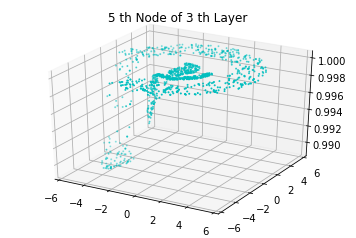

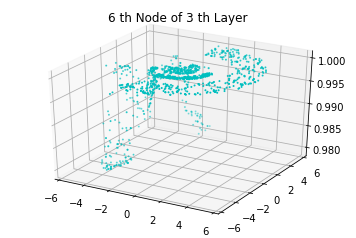

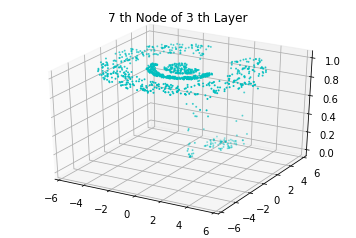

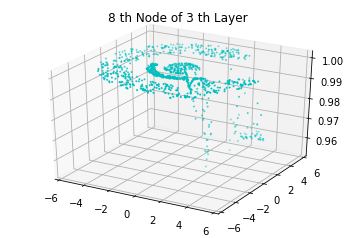

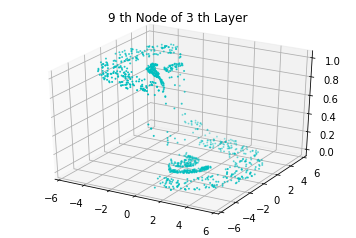

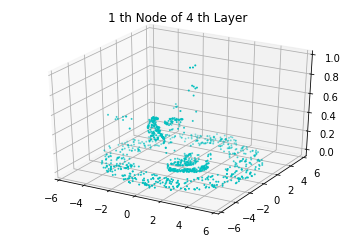

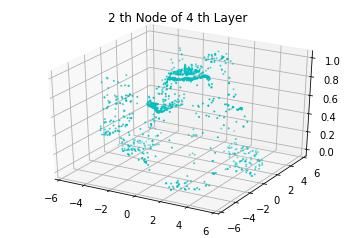

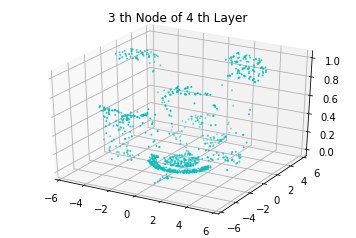

In [200]:
plotsAtHiddens(Xtrain, W, ['logistic','logistic','logistic','softmax'], 1)